### Import Dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('./datasetFinal.csv')
scaler = StandardScaler()

names = df.columns
d = scaler.fit_transform(df)

df = pd.DataFrame(d, columns = names)

y = df['generated_power']
X = df.drop(columns='generated_power')

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Training Model 
#### - SVM Linear Regression 

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR

""" svm_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_poly_reg", LinearSVR()),
]) """

svm_linear = LinearSVR(C = 100)

svm_linear.fit(x_train,y_train)

print('score', svm_linear.score(x_test,y_test))

score 0.8132150594733132


/home/pardalito/anaconda3/envs/meia/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### - Polinomial Regression

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

""" svm_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_poly_reg", SVR(kernel="poly", degree=2, C=100, epsilon=0.1)),
]) """

svm_poly = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

#svm_poly.fit(x_train,y_train)

print('score', svm_poly.score(x_test,y_test))

With PSO

In [7]:
from sklearn.svm import SVR
from pyswarm import pso

# Define the search space for the hyperparameters
lb = [1, 0.1, 1]  # lower bounds for C, epsilon, and gamma
ub = [10, 0.5, 5]  # upper bounds for C, epsilon, and gamma

# Define the fitness function that will be used to evaluate the particles
def fitness_fn(x):
    # x is a list of hyperparameters [C, epsilon, gamma]
    model = SVR(C=x[0], epsilon=x[1], gamma=x[2])
    model.fit(x_train, y_train)
    return -model.score(x_test, y_test)  # maximize the score, so we minimize the negative score

# Run the optimization
optimal_params, score = pso(fitness_fn, lb, ub, swarmsize=10, maxiter=2)

# optimal_params contains the optimal set of hyperparameters
# score is the value of the fitness function at the optimal point

ValueError: C <= 0

Stopping search: maximum iterations reached --> 2


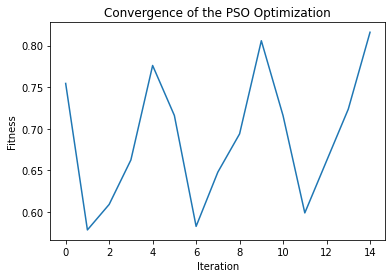

In [12]:
import matplotlib.pyplot as plt

# Define the search space for the hyperparameters
lb = [1, 0.1, 1]  # lower bounds for C, epsilon, and gamma
ub = [10, 0.5, 5]  # upper bounds for C, epsilon, and gamma

# Define a global list to store the values of the fitness function
cost_history = []

def fitness_fn(x):
    # x is a list of hyperparameters [C, epsilon, gamma]
    model = SVR(C=x[0], epsilon=x[1], gamma=x[2])
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    cost_history.append(score)  # store the value of the fitness function
    return -score  # maximize the score, so we minimize the negative score

# Run the optimization
optimal_params, score = pso(fitness_fn, lb, ub, swarmsize=5, maxiter=2)


2023-01-02 03:24:01,801 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2023-01-02 03:24:01,803 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 432x288 -pix_fmt rgba -r 30 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y animation.mp4


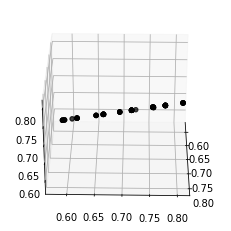

In [25]:
def update(num, x, y, z):
    ax.scatter(x[:num], y[:num], z[:num], c='k', marker='o')
    ax.view_init(elev=30, azim=num)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the animation
ani = FuncAnimation(fig, update, frames=range(1, len(cost_history)), fargs=[cost_history[:], cost_history[:], cost_history[:]], repeat=True)

# Save the animation as an MP4 file
ani.save('animation.mp4', writer='ffmpeg', fps=30)

# Show the plot

In [26]:
optimal_params

array([10.        ,  0.23848433,  2.20874739])